In [7]:
import pandas as pd
df=pd.read_csv(r'C:\Users\hnrne\Downloads\PRCP-1013-WalkRunClass\walkrun.csv')
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [10]:
if df[['activity']].values.any()==1:
    print(df)

            date                time username  wrist  activity  \
0      2017-6-30  13:51:15:847724020   viktor      0         0   
1      2017-6-30  13:51:16:246945023   viktor      0         0   
2      2017-6-30  13:51:16:446233987   viktor      0         0   
3      2017-6-30  13:51:16:646117985   viktor      0         0   
4      2017-6-30  13:51:16:846738994   viktor      0         0   
...          ...                 ...      ...    ...       ...   
88583   2017-7-9   20:9:15:317911028   viktor      0         0   
88584   2017-7-9   20:9:15:517889022   viktor      0         0   
88585   2017-7-9   20:9:15:717828989   viktor      0         0   
88586   2017-7-9   20:9:15:917932987   viktor      0         0   
88587   2017-7-9   20:9:16:117410004   viktor      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1              0.6722         -1.1233         -

<AxesSubplot:title={'center':'Training examples by activity type'}>

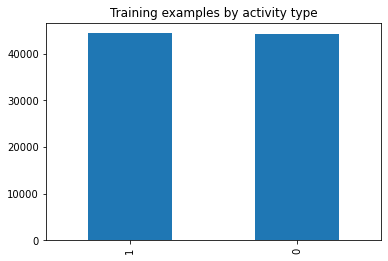

In [11]:
df['activity'].value_counts().plot(kind='bar', title='Training examples by activity type')

<AxesSubplot:title={'center':'Training examples by user'}>

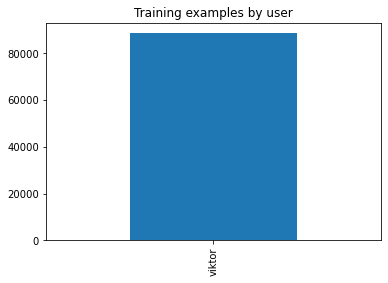

In [13]:
df['username'].value_counts().plot(kind='bar', title='Training examples by user')

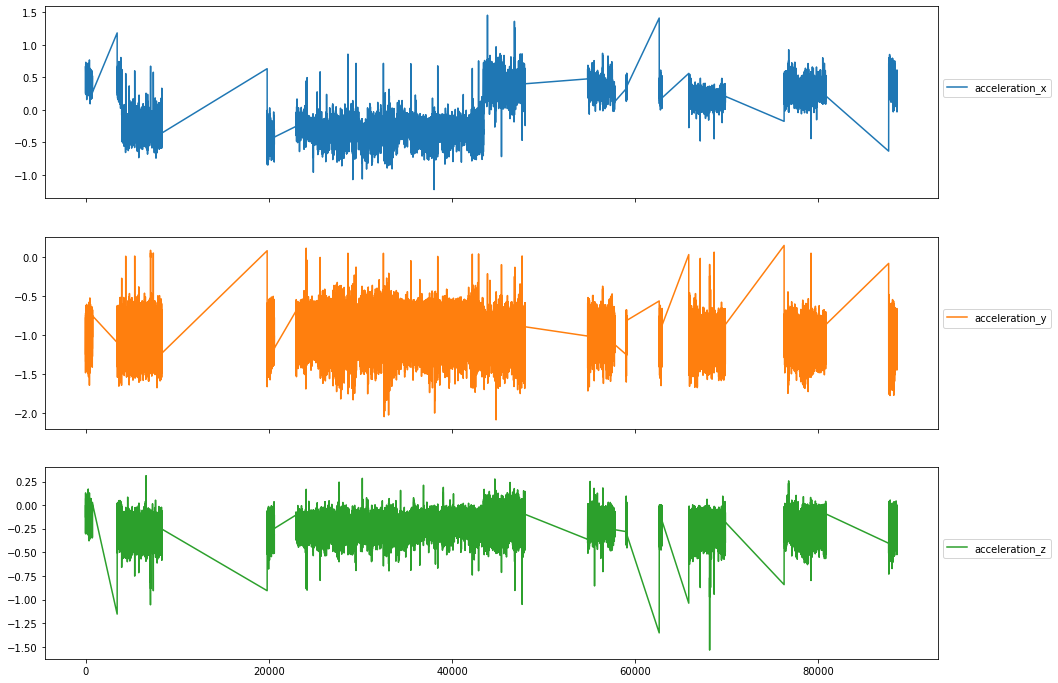

In [18]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['acceleration_x', 'acceleration_y', 'acceleration_z']][:]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity(0, df)

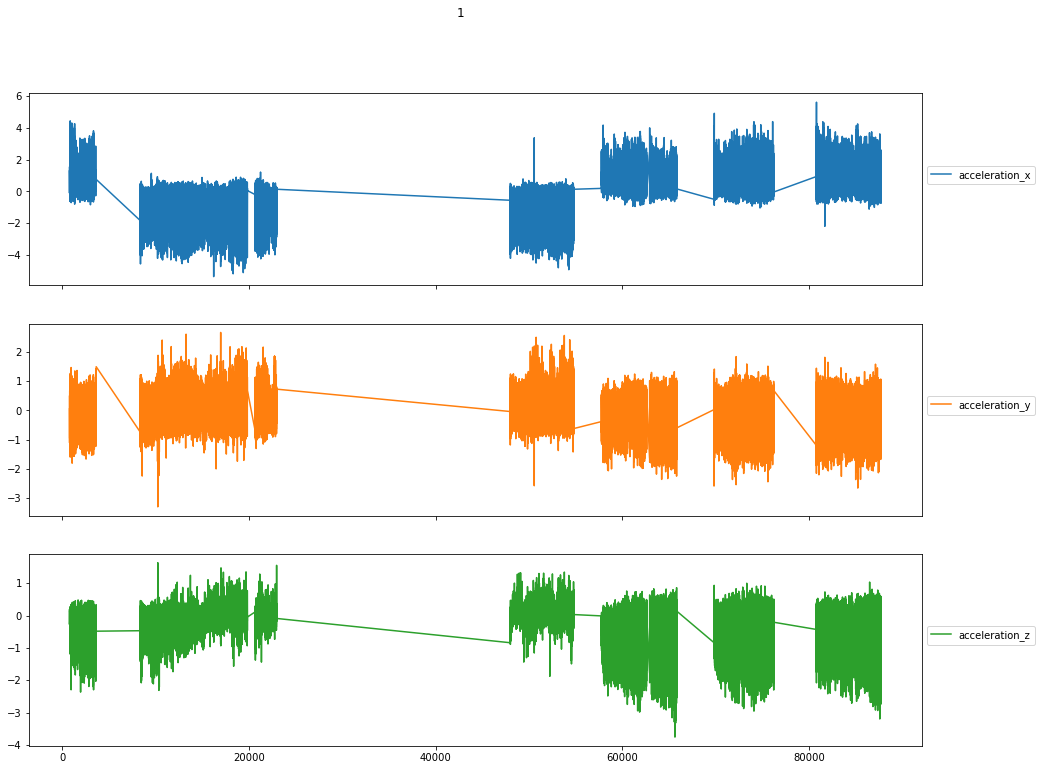

In [19]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['acceleration_x', 'acceleration_y', 'acceleration_z']][:]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity(1, df)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Libraries required for model selection

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Libraries required for the model

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPClassifier

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)

In [3]:
pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl

  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [8]:
# Number of outliers in data from accelerometer

print("Number of outliers in acceleration_x:", len(findoutliers(df.acceleration_x)))
print("Number of outliers in acceleration_y:", len(findoutliers(df.acceleration_y)))
print("Number of outliers in acceleration_z:", len(findoutliers(df.acceleration_z)))

Number of outliers in acceleration_x: 11594
Number of outliers in acceleration_y: 1588
Number of outliers in acceleration_z: 12637


In [10]:
# Number of outliers in data from gyroscope

print("Number of outliers in gyro_x:", len(findoutliers(df.gyro_x)))
print("Number of outliers in gyro_y:", len(findoutliers(df.gyro_y)))
print("Number of outliers in gyro_z:", len(findoutliers(df.gyro_z)))

Number of outliers in gyro_x: 225
Number of outliers in gyro_y: 3004
Number of outliers in gyro_z: 134


<AxesSubplot:xlabel='acceleration_x'>

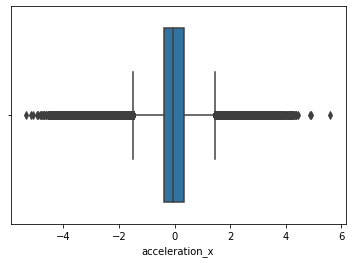

In [11]:
# acceleration_x

sns.boxplot(df.acceleration_x)

<AxesSubplot:xlabel='acceleration_z'>

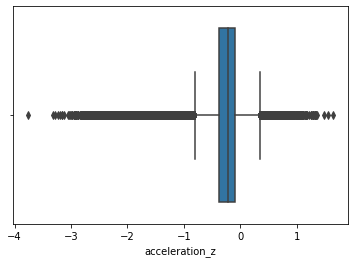

In [12]:
# acceleration_z

sns.boxplot(df.acceleration_z)

<AxesSubplot:xlabel='acceleration_y'>

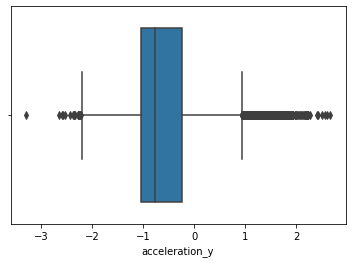

In [13]:
# acceleration_y

sns.boxplot(df.acceleration_y)

<AxesSubplot:xlabel='gyro_x'>

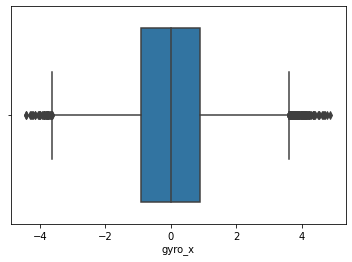

In [15]:
# gyro_x

sns.boxplot(df.gyro_x)

<AxesSubplot:xlabel='gyro_y'>

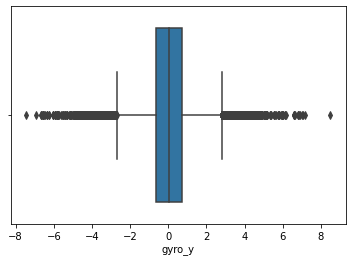

In [16]:
# gyro_y

sns.boxplot(df.gyro_y)

<AxesSubplot:xlabel='gyro_z'>

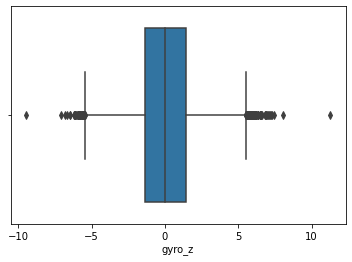

In [17]:
# gyro_z

sns.boxplot(df.gyro_z)

In [19]:
# ACTIVITY

num_walk = len(df[df["activity"] == 0].index)
num_run  = len(df[df["activity"] == 1].index)
print("There are", num_walk, "walk activities")
print("There are", num_run, "run activities")

There are 44223 walk activities
There are 44365 run activities


In [20]:

num_left   = len(df[df["wrist"] == 0].index)
num_right  = len(df[df["wrist"] == 1].index)
print("There are", num_left, "left handed individuals")
print("There are", num_right, "right handed individuals")

There are 42330 left handed individuals
There are 46258 right handed individuals


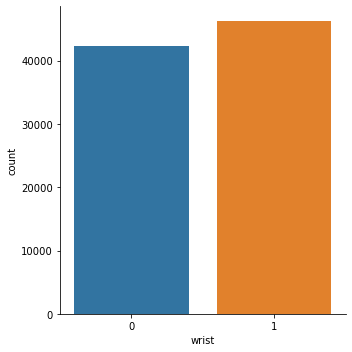

In [22]:
sns.factorplot('wrist', data = df, kind = "count")

<AxesSubplot:xlabel='acceleration_x', ylabel='Density'>

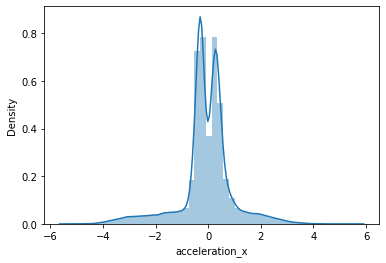

In [23]:
# acceleration_x

sns.distplot(df.acceleration_x)

<AxesSubplot:xlabel='acceleration_y', ylabel='Density'>

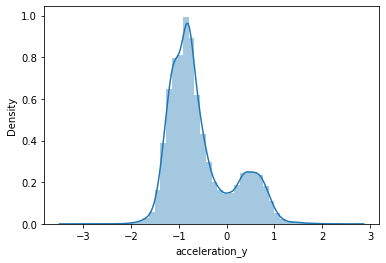

In [24]:
# acceleration_y

sns.distplot(df.acceleration_y)

<AxesSubplot:xlabel='acceleration_z', ylabel='Density'>

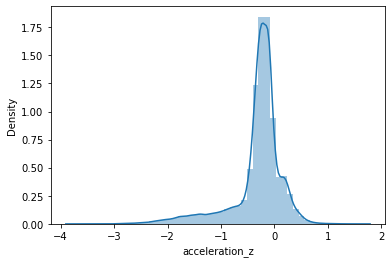

In [25]:
# acceleration_z

sns.distplot(df.acceleration_z)

In [27]:
# Correlation with the target

df.corrwith(df.activity)

wrist            -0.113404
activity          1.000000
acceleration_x   -0.017747
acceleration_y    0.639520
acceleration_z   -0.192435
gyro_x            0.040856
gyro_y            0.012055
gyro_z           -0.008106
dtype: float64

<AxesSubplot:>

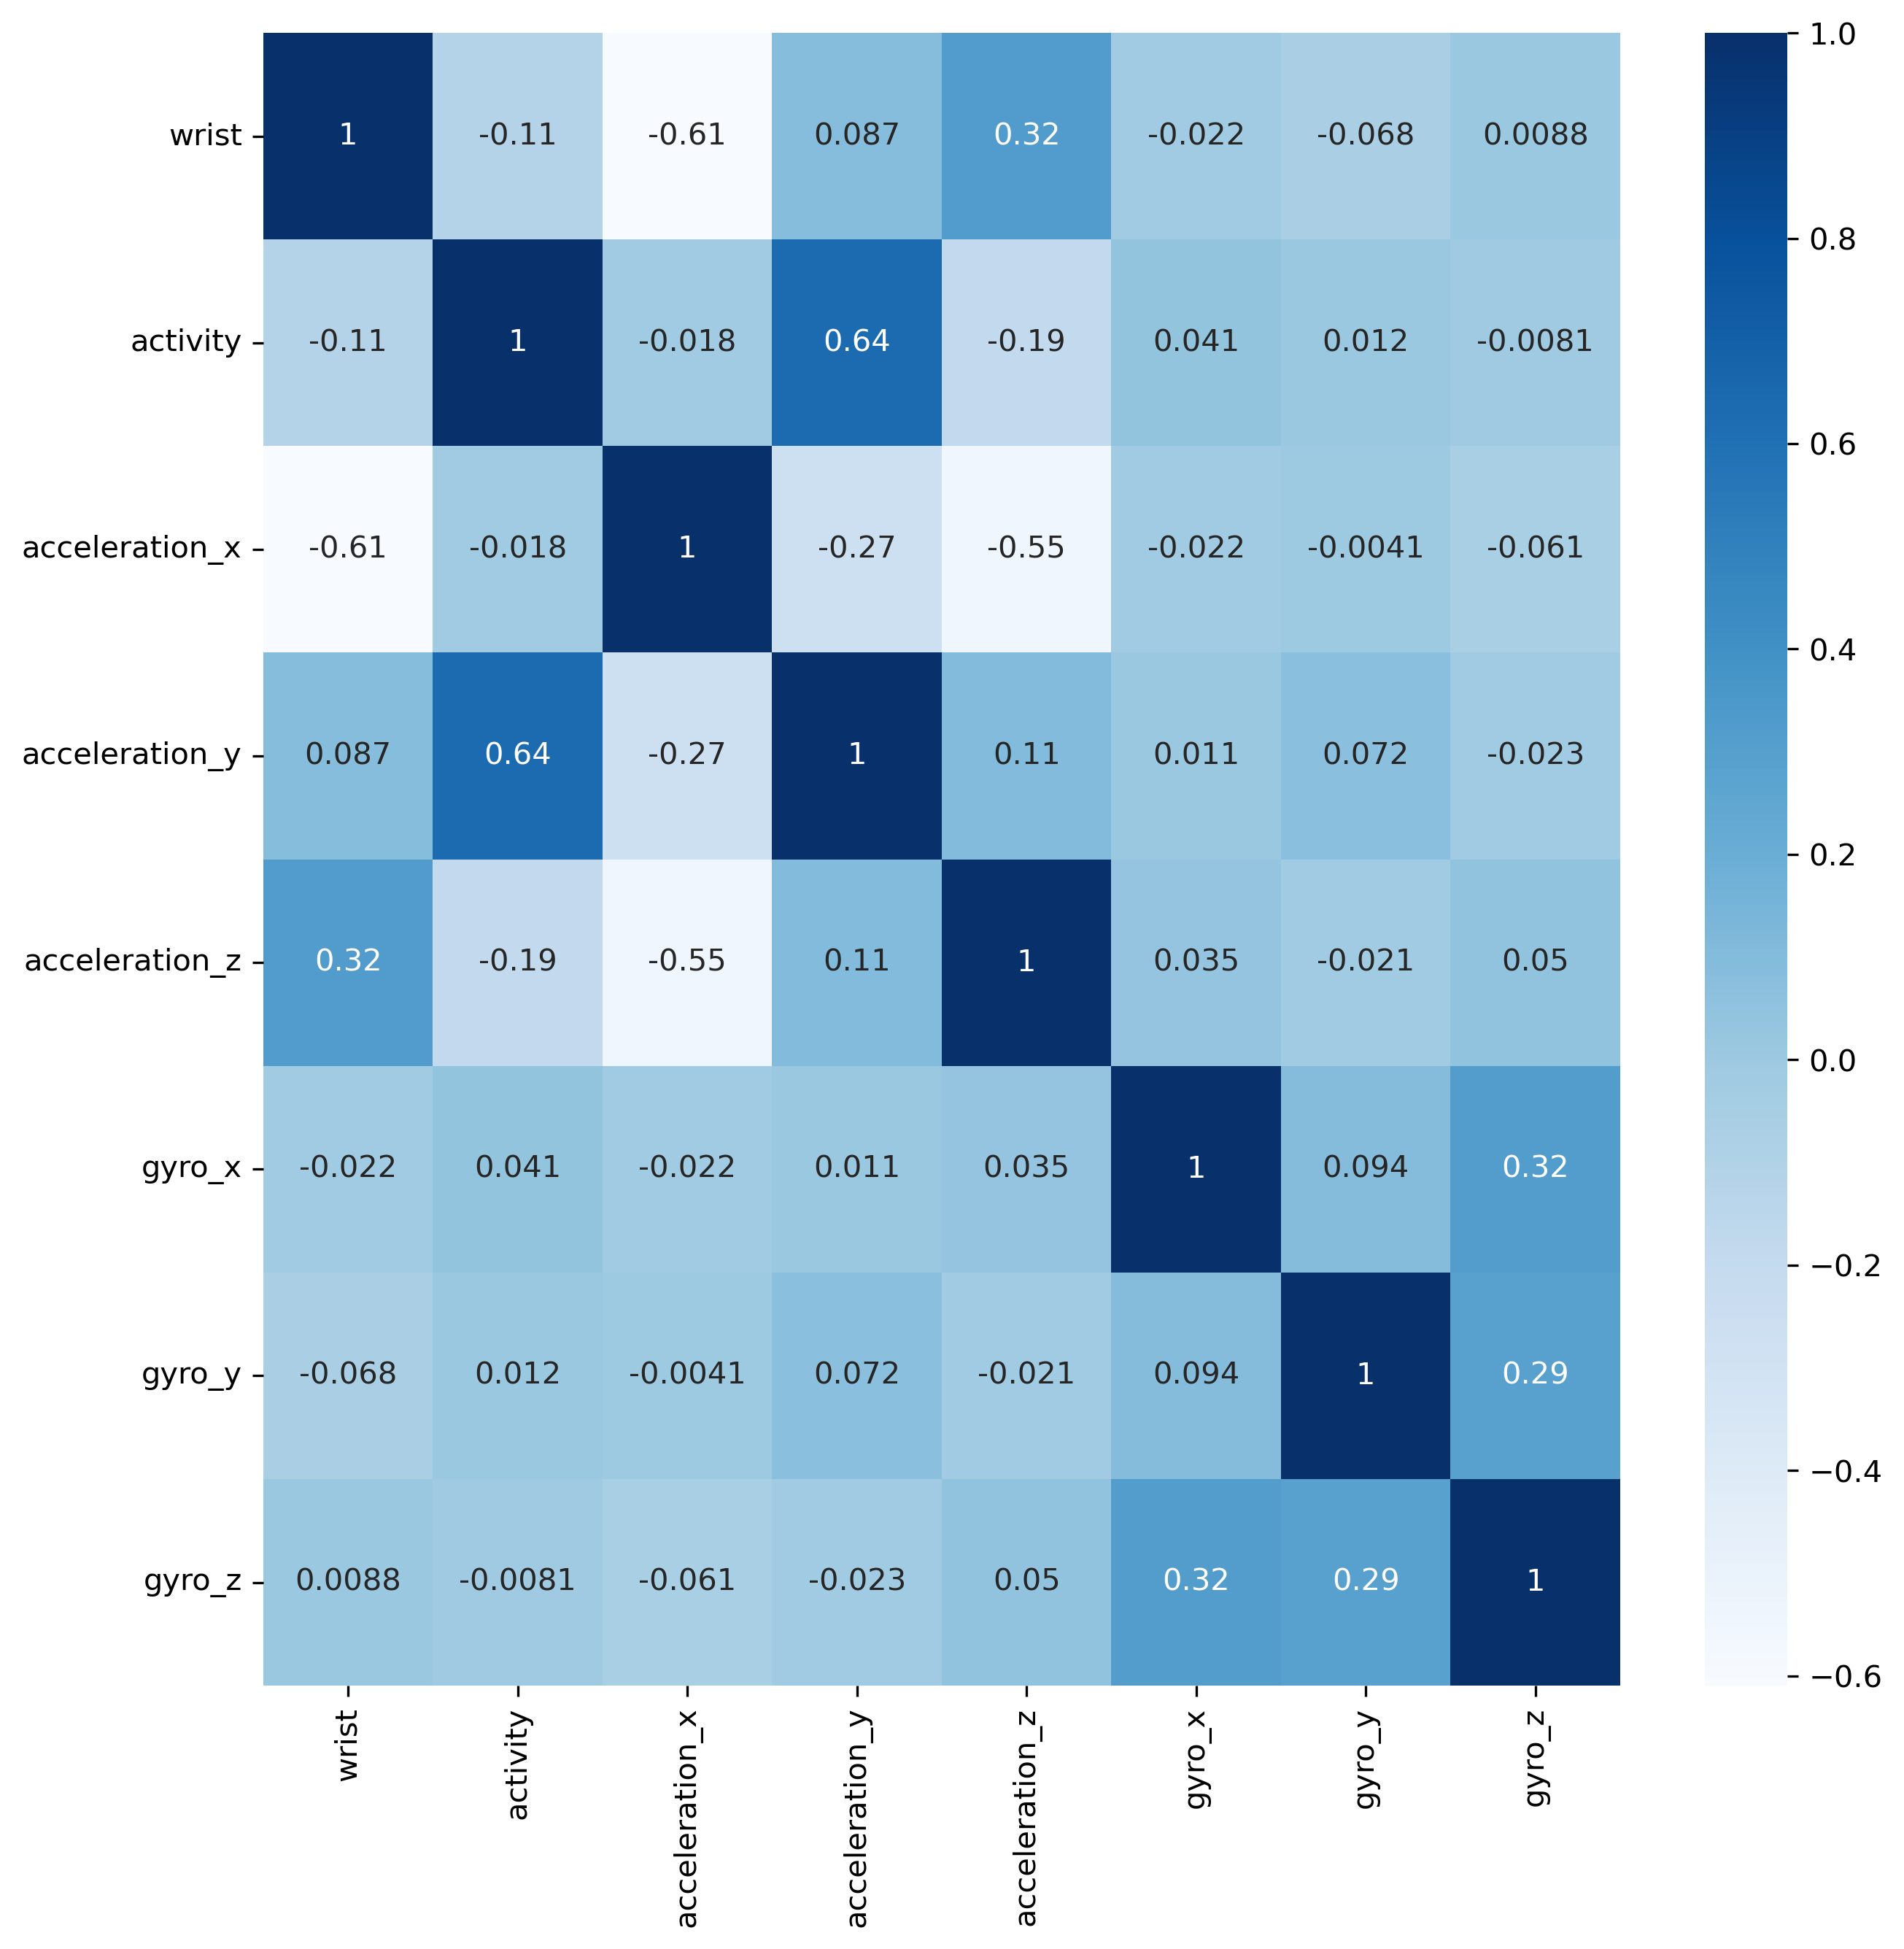

In [28]:
# Getting the correlations of each features in dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10), dpi = 300)

# Plot Heatmap

sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")

In [29]:
# Independent variable

X = df.iloc[:,[3,5,6,7,8,9,10]]

# Dependent variable

y = df.activity

In [31]:
X

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [32]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 23)

In [34]:
# Creating the model

def create_baseline():
    model = keras.Sequential(
    [
        layers.Dense(14, input_shape = (None,7), activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1,  activation="sigmoid"),
    ]
    )
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
# Initializing the model

model= create_baseline()

In [38]:
# Checking the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, None, 14)          112       
_________________________________________________________________
dense_6 (Dense)              (None, None, 20)          300       
_________________________________________________________________
dense_7 (Dense)              (None, None, 10)          210       
_________________________________________________________________
dense_8 (Dense)              (None, None, 5)           55        
_________________________________________________________________
dense_9 (Dense)              (None, None, 1)           6         
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Training the model

model.fit(x_train, y_train, batch_size=128, epochs=15)

Epoch 1/15
485/485 [==============================] - 1s 1ms/step - loss: 0.2829 - accuracy: 0.8910
Epoch 2/15
485/485 [==============================] - 0s 606us/step - loss: 0.0683 - accuracy: 0.9780
Epoch 3/15
485/485 [==============================] - 0s 638us/step - loss: 0.0521 - accuracy: 0.9838
Epoch 4/15
485/485 [==============================] - 0s 694us/step - loss: 0.0442 - accuracy: 0.9858
Epoch 5/15
485/485 [==============================] - 0s 653us/step - loss: 0.0382 - accuracy: 0.9875
Epoch 6/15
485/485 [==============================] - 0s 666us/step - loss: 0.0338 - accuracy: 0.9886
Epoch 7/15
485/485 [==============================] - 0s 652us/step - loss: 0.0315 - accuracy: 0.9893
Epoch 8/15
485/485 [==============================] - 0s 609us/step - loss: 0.0300 - accuracy: 0.9900
Epoch 9/15
485/485 [==============================] - 0s 651us/step - loss: 0.0286 - accuracy: 0.9904
Epoch 10/15
485/485 [==============================] - 0s 665us/step - loss: 0.0279 

In [41]:
 

model = MLPClassifier()

# Training

model.fit(x_train,y_train)

# Predicting

y_predict=model.predict(x_test)

# Testing

accuracy_score(y_test,y_predict)

0.9927004552808819